## Unsupervised Learning : Clustering

|-|continuous|categorical|
|---|---|---|
|**supervised**|regression|classification|
|**unsupervised**|**dimension reduction**|**clustering**|

Clustering is one of the types of unsupervised learning. It is similar to classification: the aim is to give a label to each data point. However, unlike in classification, we are not given any examples of labels associated with the data points. We must infer from the data, which data points belong to the same cluster. This can be achieved using some notion of distance between the data points. Data points in the same cluster are somehow close to each other. There are two categories of Clustering algorithms: `Hierarhical Clustering` and `Partitioning Clustering`.

![](figures/08.01-clustering-category.jpg)

One of the simplest clustering methods is the *k-means clustering* (center-based Partitioning Algorithm). It aims at producing a clustering that is optimal in the following sense:

* the *centre of each cluster* is the average of all points in the cluster
* any point in a cluster is closer to its centre than to a centre of any other cluster

The k-means clustering is first given the wanted number of clusters, say k, as a *hyperparameter*. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

* any data point is set to belong to a cluster, whose centre is closest to it
* then for each cluster a new centre is chosen as the average of the data points in the cluster

This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.
(http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans #library for K-Means Clustering
from sklearn import datasets


In [3]:
# ------------------------------------------
# Centroid is the center point of some data
# EXERCISE: Compute the centroid of the following data
#           [2, 5], [4, 4], [3, 3]
# ------------------------------------------

d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)

In [4]:
print(x,y)

3.0 4.0


### Simple example

The scikit-learn library has an implementation of the k-means algorithm. Let's apply it to a set of randomly generated blobs, whose labels we throw away.

# [K-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)

In this part, we are going to cluster the `make_blobs` and `iris` dataset using K-Means method. The KMeans algorithm clusters data by trying to separate samples in `n` groups of equal variance, minimizing a criterion known as the **inertia** or within-cluster sum-of-squares (WSS).


`make_blobs` is to generate isotropic Gaussian blobs for clustering.

In [12]:
#import the library
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs

In [13]:
# create a random data with 2 features (x1 & x2), centroid 1
# by default, it generates 100 random data
X, y = make_blobs(n_features=2, centers=1)  # X : n_features / y : centers(c=y이기 때문)

In [14]:
# n_samples : 표본 데이터 수
# n_features : 독립변수의 수
# X : [n_samples, n_features] 크기의 배열 : 독립변수
# y : [n_samples] 크기의 배열 : 종속 변수

Text(0.5, 1.0, 'centers = 1')

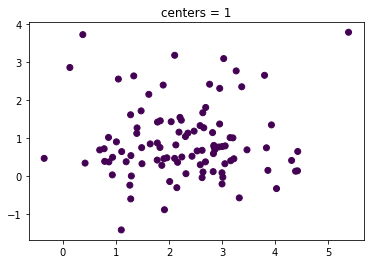

In [15]:
#plot the X and y (plot 1)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y) # 0번째랑 1번째 분석
plt.savefig('centers_1.png')
plt.title('centers = 1')

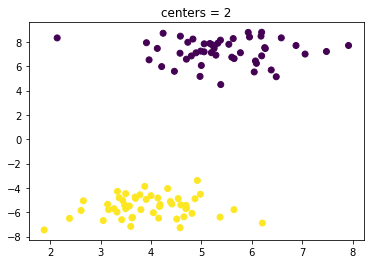

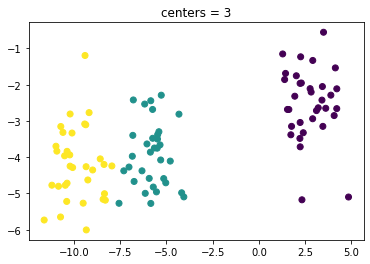

In [16]:
# plot 2    
X, y = make_blobs(n_features=2, centers=2) # number of features (x1 & x2), centroid 2
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')

# plot 3
X, y = make_blobs(n_features=2, centers=3) # number of features (x1 & x2), centroid 3
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 3')

plt.show()

Using the `make_blobs`, we can create other dataset as follows. 
- centers = 4
- n_features = 2
- n_samples = 200
- random_state = 0


In [17]:
# Set the parameters of make_blobs
X,y = make_blobs(centers=4, n_features=2, n_samples=200, random_state=0, cluster_std=0.7) # 4개 군집, feature 2개인 sample 200개 뽑음
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


[1 2 0 3 1 0 2 0 0 0] -> centroid number 1,2,3,4...

Now we plot these points, but without coloring the points using the labels:

In [16]:
print(y)

[1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 1 0 2 3 3 3 0 0 2 0 2 1 0 1 0
 2 2 3 0 3 1 1 0 3 2 2 2 0 3 1]


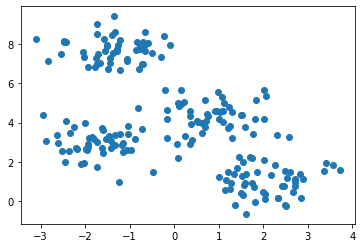

In [17]:
plt.scatter(X[:,0],X[:,1]);

We can still discern four clusters in the data set. Let's see if the k-means algorithm can recover these clusters. First we create the instance of the k-means model by giving it the number of clusters 4 as a hyperparameter.

In [18]:
#load the library for K-means algorithm
from sklearn.cluster import KMeans

In [19]:
# set k = 4 and fit the k-means algorithm to the data (X)
model = KMeans(4) # if k=3 -> 3 centroid
model.fit(X)
# X : data ( data point is X, y )
# cluster based on data point X,y

KMeans(n_clusters=4)

In [20]:
#print the cluster centers and the labels
print(model.cluster_centers_) # centroid (k=4 -> 4 centroid)
print(model.labels_) # this 200 values assign to group(0,1,2)
# [[ 0.86008475  4.31501411] -> group 0
# [-1.36512238  7.70188306] -> group 1
# [-1.70639178  2.9104771 ] -> group 2
# [ 2.07464749  0.9869902 ]] -> group 3

[[ 0.86008475  4.31501411]
 [-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [-1.70639178  2.9104771 ]]
[2 3 0 1 2 0 3 0 0 0 0 2 3 3 2 0 1 1 1 2 1 3 2 3 2 2 1 2 2 0 1 0 3 2 3 0 3
 0 0 1 1 1 1 0 2 3 0 1 1 0 1 3 3 1 0 1 3 2 0 2 1 0 2 0 1 0 2 1 3 3 2 2 0 0
 3 1 3 3 2 2 1 0 2 3 3 0 0 2 3 3 1 1 1 0 0 2 3 1 0 0 1 2 2 1 1 3 0 2 2 0 1
 3 3 2 2 0 3 3 1 0 1 3 0 2 0 3 0 3 2 0 3 2 0 1 1 3 1 1 2 1 2 3 2 2 3 2 0 2
 3 1 1 1 0 3 2 0 1 3 1 2 1 2 2 3 3 1 0 2 2 3 2 0 3 1 1 1 0 0 3 0 0 2 0 2 0
 3 3 1 0 1 2 2 0 1 3 3 3 0 1 2]


- The cluster centers consists of two values (x1 and x2)
- Since k = 4, there are 4 centroids 
- The generated data has 200 values.
- Each value is assigned to the group, either 0,1,2, or 3. (since k = 4)


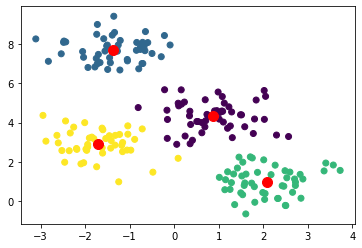

In [21]:
# plotting the 4 clusters with the center point (centroid)
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centers

red point : center point

The clustering looks more or less correct. To get a more quantitative measure of success we can get the accuracy score.

In [22]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.25


Oops! Even though the clusters could match almost perfectly to the original, their labels might be permuted(재배치된). Let's select randomly one point from each cluster and check their labels from the original data labels. Then we use this label for the whole cluster. In essence, we are renaming the clusters, not re-clustering the data.

In [26]:
print(y)
# random y

[1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 1 0 2 3 3 3 0 0 2 0 2 1 0 1 0
 2 2 3 0 3 1 1 0 3 2 2 2 0 3 1]


In [27]:
print(model.labels_)
# random y로 뽑은 label(random y를 센터 범위에 맞춰서 클러스터의 종류별로 숫자를 나눔)

[0 1 3 2 0 3 1 3 3 3 3 0 1 1 0 3 2 2 2 0 2 1 0 1 0 0 2 0 0 3 2 3 1 0 1 3 1
 3 3 2 2 2 2 3 0 1 3 2 2 3 2 1 1 2 3 2 1 0 3 0 2 3 0 3 2 3 0 2 1 1 0 0 3 3
 1 2 1 1 0 0 2 3 0 1 1 3 3 0 1 1 2 2 2 3 3 0 1 2 3 3 2 0 0 2 2 1 3 0 0 3 2
 1 1 0 0 3 1 1 2 3 2 1 3 0 3 1 3 1 0 3 1 0 3 2 2 1 2 2 0 2 0 1 0 0 1 0 3 0
 1 2 2 2 3 1 0 3 2 1 2 0 2 0 0 1 1 2 3 0 0 1 0 3 1 2 2 2 3 3 1 3 3 0 3 0 3
 1 1 2 3 2 0 0 3 2 1 1 1 3 2 0]


In [28]:
# check the results from the clustering
clusters = model.fit_predict(X)
clusters

array([3, 2, 1, 0, 3, 1, 2, 1, 1, 1, 1, 3, 2, 2, 3, 1, 0, 0, 0, 3, 0, 2,
       3, 2, 3, 3, 0, 3, 3, 1, 0, 1, 2, 3, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       3, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 3, 1, 3, 0, 1, 3, 1, 0, 1,
       3, 0, 2, 2, 3, 3, 1, 1, 2, 0, 2, 2, 3, 3, 0, 1, 3, 2, 2, 1, 1, 3,
       2, 2, 0, 0, 0, 1, 1, 3, 2, 0, 1, 1, 0, 3, 3, 0, 0, 2, 1, 3, 3, 1,
       0, 2, 2, 3, 3, 1, 2, 2, 0, 1, 0, 2, 1, 3, 1, 2, 1, 2, 3, 1, 2, 3,
       1, 0, 0, 2, 0, 0, 3, 0, 3, 2, 3, 3, 2, 3, 1, 3, 2, 0, 0, 0, 1, 2,
       3, 1, 0, 2, 0, 3, 0, 3, 3, 2, 2, 0, 1, 3, 3, 2, 3, 1, 2, 0, 0, 0,
       1, 1, 2, 1, 1, 3, 1, 3, 1, 2, 2, 0, 1, 0, 3, 3, 1, 0, 2, 2, 2, 1,
       0, 3])

In [32]:
lsss = np.zeros_like(clusters)
lsss
# 다 0으로 바꿔주는 함수 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [33]:
for i in range(4):
    mask = (clusters == i) 
    print(clusters)

[3 2 1 0 3 1 2 1 1 1 1 3 2 2 3 1 0 0 0 3 0 2 3 2 3 3 0 3 3 1 0 1 2 3 2 1 2
 1 1 0 0 0 0 1 3 2 1 0 0 1 0 2 2 0 1 0 2 3 1 3 0 1 3 1 0 1 3 0 2 2 3 3 1 1
 2 0 2 2 3 3 0 1 3 2 2 1 1 3 2 2 0 0 0 1 1 3 2 0 1 1 0 3 3 0 0 2 1 3 3 1 0
 2 2 3 3 1 2 2 0 1 0 2 1 3 1 2 1 2 3 1 2 3 1 0 0 2 0 0 3 0 3 2 3 3 2 3 1 3
 2 0 0 0 1 2 3 1 0 2 0 3 0 3 3 2 2 0 1 3 3 2 3 1 2 0 0 0 1 1 2 1 1 3 1 3 1
 2 2 0 1 0 3 3 1 0 2 2 2 1 0 3]
[3 2 1 0 3 1 2 1 1 1 1 3 2 2 3 1 0 0 0 3 0 2 3 2 3 3 0 3 3 1 0 1 2 3 2 1 2
 1 1 0 0 0 0 1 3 2 1 0 0 1 0 2 2 0 1 0 2 3 1 3 0 1 3 1 0 1 3 0 2 2 3 3 1 1
 2 0 2 2 3 3 0 1 3 2 2 1 1 3 2 2 0 0 0 1 1 3 2 0 1 1 0 3 3 0 0 2 1 3 3 1 0
 2 2 3 3 1 2 2 0 1 0 2 1 3 1 2 1 2 3 1 2 3 1 0 0 2 0 0 3 0 3 2 3 3 2 3 1 3
 2 0 0 0 1 2 3 1 0 2 0 3 0 3 3 2 2 0 1 3 3 2 3 1 2 0 0 0 1 1 2 1 1 3 1 3 1
 2 2 0 1 0 3 3 1 0 2 2 2 1 0 3]
[3 2 1 0 3 1 2 1 1 1 1 3 2 2 3 1 0 0 0 3 0 2 3 2 3 3 0 3 3 1 0 1 2 3 2 1 2
 1 1 0 0 0 0 1 3 2 1 0 0 1 0 2 2 0 1 0 2 3 1 3 0 1 3 1 0 1 3 0 2 2 3 3 1 1
 2 0 2 2 3 3 0 1 3 2 2 1 1 3 2 2 0 0

In [31]:
mask

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [29]:
# Fix permuted labels(relabeling)
from scipy import stats
labels = np.zeros_like(clusters) #prepare an array with the same size of clusters and put the value 0
for i in range(4): # 4 위치에 클러스터의 갯수 넣어주기
    mask = (clusters == i) # mask = TRUE if the clusters equal to the i
    labels[mask] = stats.mode(y[mask])[0] #choose the mode (the most common value) and put it on the label
# 단순히 가장 많은 값을 찾는 것뿐 아니라 값의 수가 동일할 때는 가장 앞에 있는 값을 선택 -> 이런 방식으로 값을 찾는 것이 scipy 라이브러리의 stat.mode

In [30]:
labels

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

In [31]:
print("Accuracy score is", accuracy_score(y, labels))
# accuracy is 높아짐(재배치 후)

Accuracy score is 0.99


So, the k-means algorithm seems to work well in this case, but there can be several problems. Firstly, even though an EM algorithm always converges, it might converge to a local maximum. To avoid this, EM type algorithms are usually run several times, each time starting from different random initial values. For instance, in the scikit-learn implementation, the algorithms is restarted by default 10 times. (Scikit-learn 구현에서 알고리즘은 기본적으로 10번 재시작된다)

## Clustering with Iris dataset

For this experiment, we extract the iris dataset.

In [43]:
# Import iris data
iris = datasets.load_iris() # data frame
d = iris.data # array

np.random.seed(0) # the same seed number will produce the same random number
d

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Using the K-means algorithm, we need to set the initial values. The default of the initial values is random. However, we can set to other parameters such as `k-means++` for 'smart' selection of the centroid.

In [37]:
d[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [39]:
# Run KMeans, init = initial center point
est = KMeans(n_clusters=3, init='random')#generate a k-means model. you can change from 'random' to 'k-means++' for (sometimes) a better result
# est는 클러스터 3개짜리의 데이터 분석하는 것
est.fit(d) #fit into the data d -> est에 data d를 넣음
y_kmeans = est.predict(d) #put the cluster label into the variable y_k-means

In [40]:
est

KMeans(init='random', n_clusters=3)

In [41]:
y_kmeans
# 3 cluster이기 때문에 3개의 숫자가 나옴
# 2는 group number 2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [42]:
y_kmeans[0:100] #99까지 뽑음

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Find the error of the cluster results

In [42]:
est.fit_predict(d) # 클러스터를 만들고 소속 정보를 얻기 위해 fit_predict 메서드를 사용
inertia = est.inertia_ # 클러스터의 수가 증가할수록, inertia는 감소-> inertia : error
inertia
# inertia를 최소화 시키면서 동시에 클러스터의 수를 최소화 시키는 것 -> 이 때 최적의 클러스터 수를 결정하는 한 가지 방법은 ‘elbow’ 메소드 입니다.

78.851441426146

To distinguish the visualization, we can colors in an array. For this visualization, we select the features sepal length (column 2) and petal length (column 0).

Text(0, 0.5, 'sepal length (cm)')

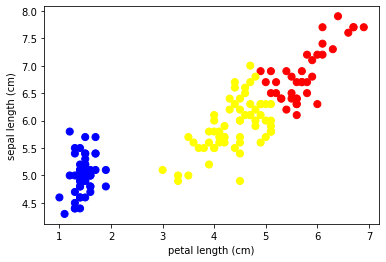

In [44]:
colors = np.array(['red','blue','yellow']) #red:group 1, blue:group 2, yellow:group 0
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50) #column2: sepal length(x축), column0:petal length(y축) -> 종류는 3개
plt.xlabel(iris.feature_names[2]) # petal length
plt.ylabel(iris.feature_names[0]) # sepal length

We can plot only the centroid (the center point of the cluster in regard to the group of data in the particular cluster)

In [45]:
centers = est.cluster_centers_ # get the clusters centers
centers
# center point for each column(column이 4개)

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

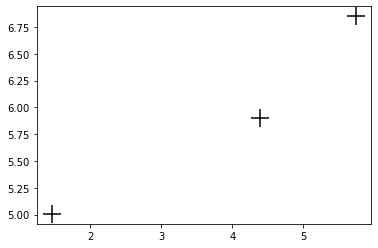

In [46]:
plt.scatter(centers[:, 2], centers[:, 0], c='k', marker='+', s=300) # c : color
# x축, y축은 위와 같이 유지

By combining two scatter plots, we can see the data in corresponding to the centroid value.

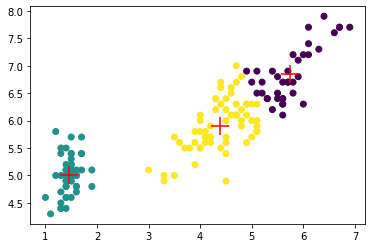

In [47]:
plt.scatter(d[:,2],d[:,0], c=est.labels_); # color가 est.labels(label별로 다르다)
plt.scatter(est.cluster_centers_[:,2], est.cluster_centers_[:,0], c='red', marker='+', s=300); # Show the centres

Consequently, we can plot all the features in subplot.

Text(0.5, 0, 'petal width (cm)')

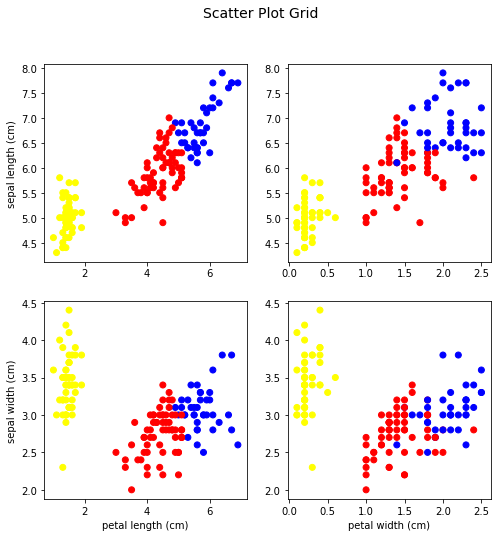

In [56]:
#================================
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans]) # put column 2 and column 0
plt.ylabel(iris.feature_names[0])

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])

#================================

In some cases, we can visualize the features into 3D plot. Referring to the features Sepal Length, Sepal Width, and Petal Length, 

Text(0.5, 0, 'petal length (cm)')

<Figure size 432x288 with 0 Axes>

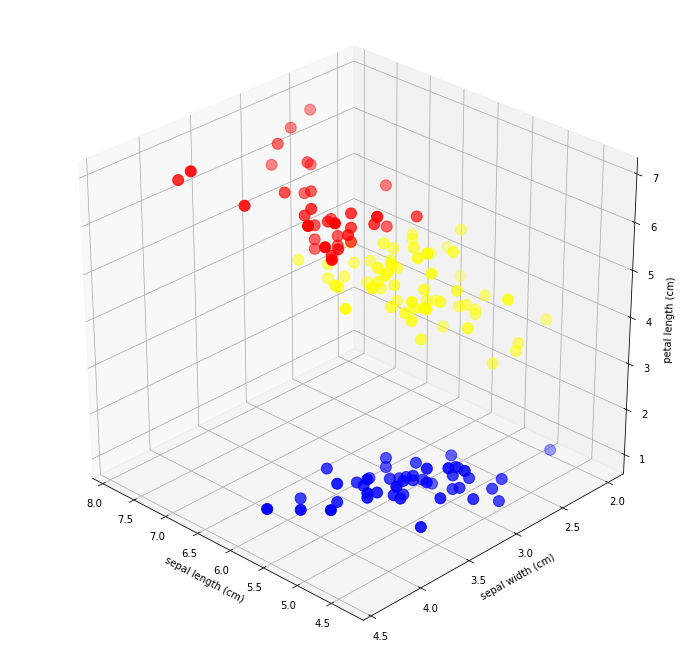

In [48]:
# Option #2: 3d plot
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120) #0,1,2만 바꿔주기
ax.set_xlabel(iris.feature_names[0])#'Sepal Length'
ax.set_ylabel(iris.feature_names[1])#'Sepal Width'
ax.set_zlabel(iris.feature_names[2])#'Petal Length'
# [0][1][2] 에 숫자만 바꿔주기
# Modified from the example here: 
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

Using the visualization, we can select the best number of k. However, it is sometime difficult to choose the number of k due to the variance of the data. There are several approaches on choosing the number of cluster.

- Elbow Method
- Silhoutte Method (Score)


## Choosing number of cluster

### Elbow Method

First of all, we are going to choose the number of cluster by [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). 

Inertia is sum of squared distances of samples to their closest cluster center. 

$$SSE = \sum_{i}\sum_{j} (x_{ij} - c_{i})^2 $$

And the Elbow method looks at the inertia as a function of the number of clusters. One should choose a number of clusters so that adding another cluster doesn’t improve much better the inertia.



In [49]:
#Elbow Method
seed = 0 # put random number
elbow = dict() # create a dictionary (key, value)
for k in range(1,11): # k =1, 2, 3, 4, ... 11
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(d)
    inertia = estimator.inertia_ # inertia : error
    elbow[k] = inertia # put inertia into variable elbow


In [50]:
elbow # inertia (error) for each k
# k = 1 -> inertia : 681.37...

{1: 681.3705999999996,
 2: 152.34795176035797,
 3: 78.851441426146,
 4: 57.25600931571815,
 5: 46.44618205128204,
 6: 39.03998724608725,
 7: 34.299712121212146,
 8: 30.014398496240617,
 9: 28.03690635345049,
 10: 26.534529220779234}

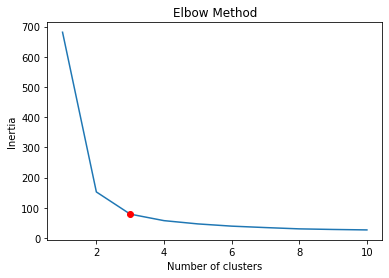

In [51]:
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro') # put the dot in the k = 3 -> 이 숫자 바꿔주기
# 2 or 3 is best one(number of cluster이 2 or 3)
# minimun이 좋다고 했으면서 왜 10은 안됨 ?
# 왜냐면 graph is decreasing(0으로 수렴하기 때문)
# 처음 깊게 들어간 그 점이 best point임

From the figure above, we can see that when the number of cluster is 3, it's hard to tell whether adding another cluster can improve much better the inertia or not.

### Average silhouette method

The [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) is calculated using the mean intra-cluster distance (`a`) and the mean nearest-cluster distance (`b`) for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. It measures the quality of a clustering.

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

In [52]:
# 실루엣 계수는 한 클러스터 안에 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타낸다.

# 클러스터 안의 거리가 짧을수록 좋고(cohesion), 다른 클러스터와의 거리가 멀수록 좋다.(separation)

# 실루엣은 -1~1사이의 값을 가지며 1에 가까울수록 잘 부합하는 데이터이다. 실루엣 계수가 0이면 지금클러스터나 다른 클러스터 어디에 있든 상관 없음을 의미한다.

<a id='interpret-sil'></a>
## Interpreting the silhouette coefficient
---

When you calculate the silhouette score using sklearn you get out a single number. THis is the average silhouette score for all of the individual observations.

In general, we want separation to be high and cohesion to be low. This corresponds to a value of **SC** close to +1.

A negative silhouette coefficient means the cluster radius is larger than the space between clusters, and thus clusters overlap. Another way to think about this is that negative values indicate that non-assigned clusters are more similar than the assigned cluster.


In [53]:
# 음의 실루엣 계수는 클러스터 간에 겹치는 것을 의미
# 음수 값은 할당되지 않은 클러스터가 할당된 클러스터보다 더 유사한 것

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3648340039670018
For n_clusters = 7 The average silhouette_score is : 0.354457992531674
For n_clusters = 8 The average silhouette_score is : 0.34873453772193763
For n_clusters = 9 The average silhouette_score is : 0.31944608860386825
For n_clusters = 10 The average silhouette_score is : 0.32363460215614437


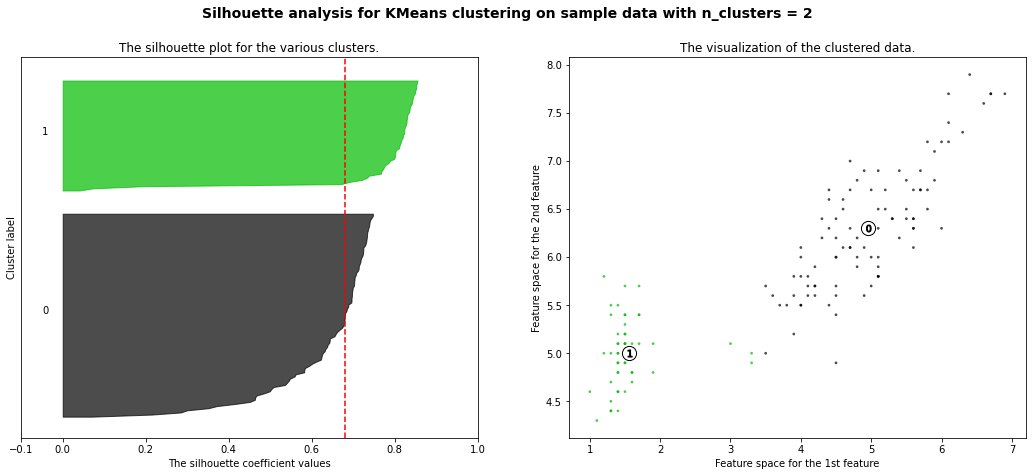

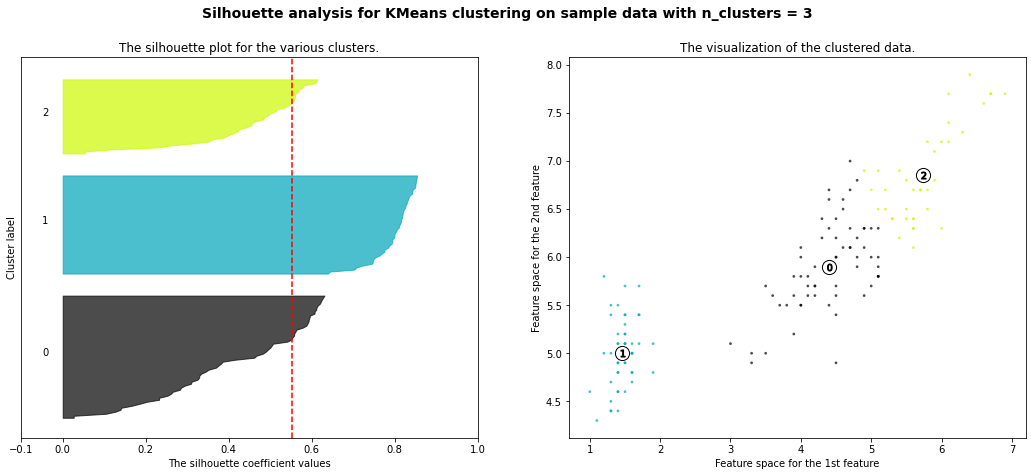

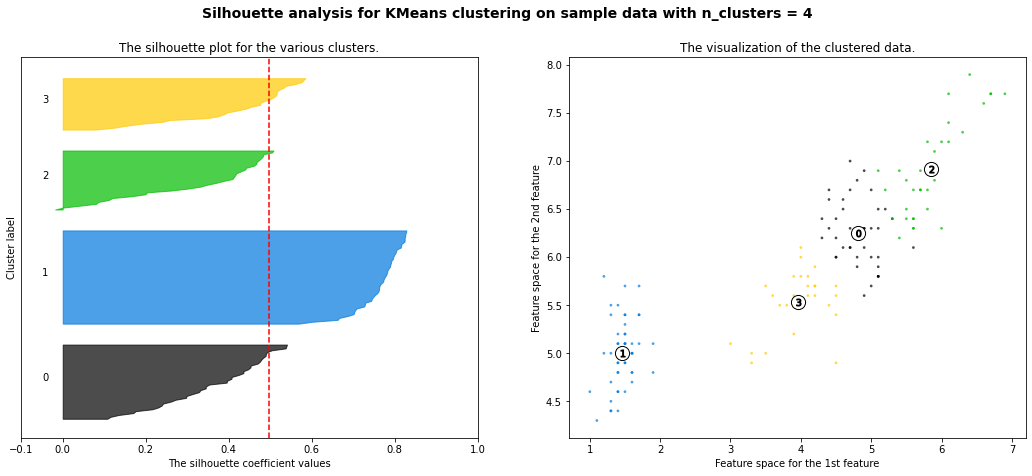

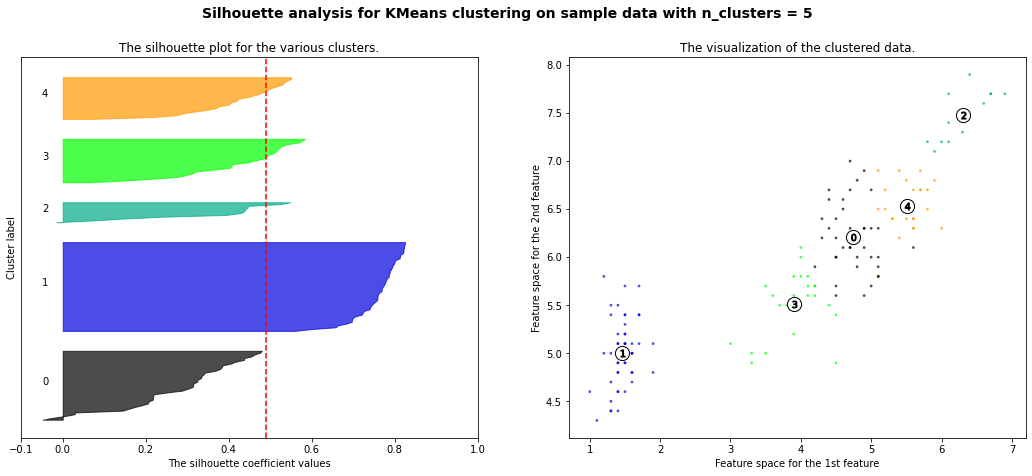

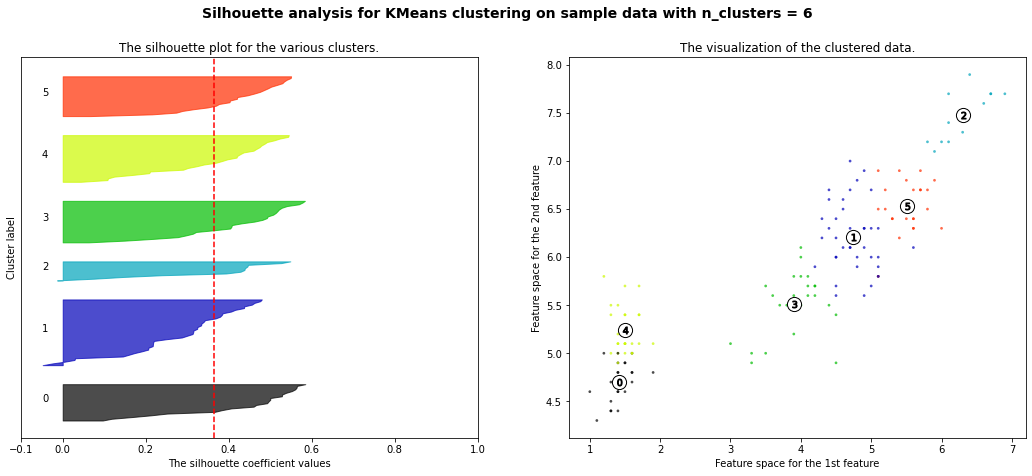

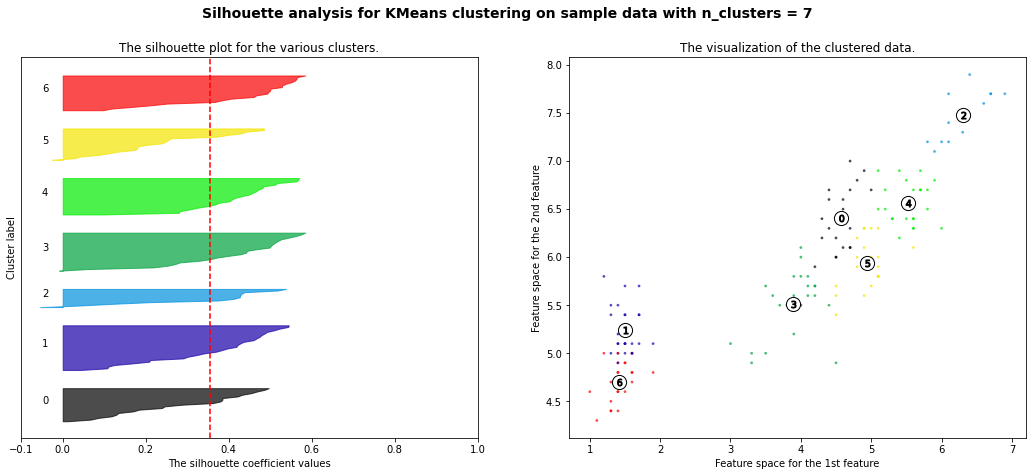

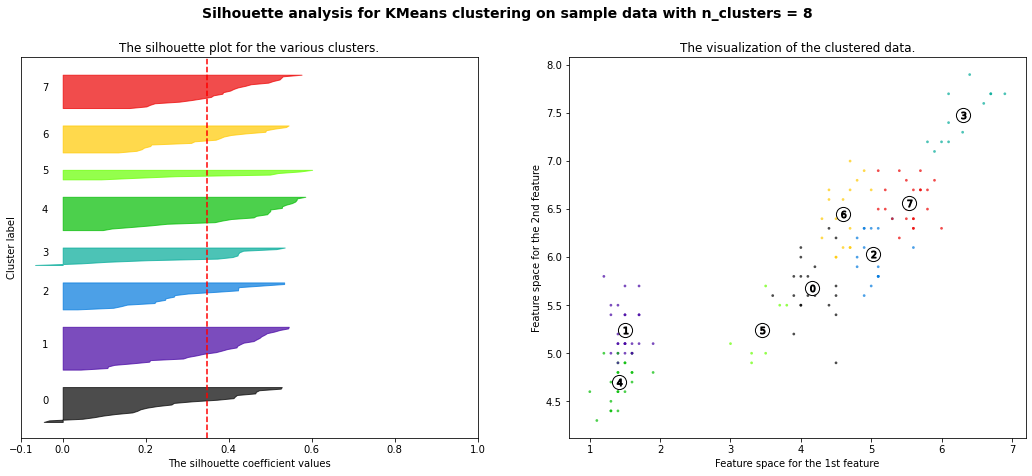

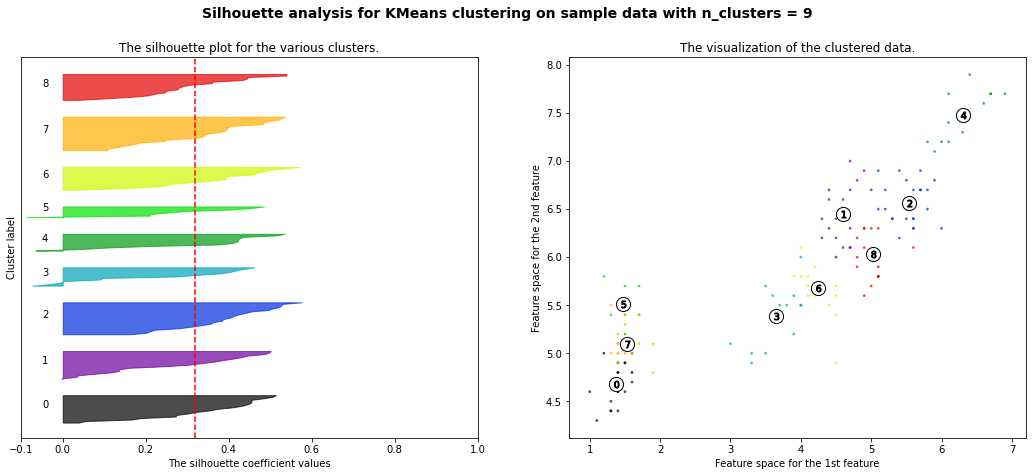

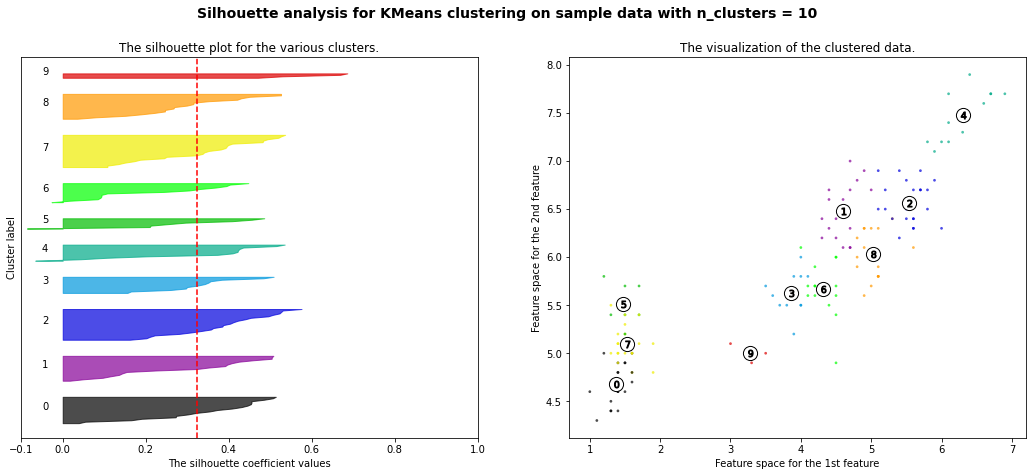

In [55]:
# Silhouette Score Method
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(d[:, 2], d[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
# higher is the better(아래의 matrix 숫자)
# k=2 is the best
# 중간에 동그라미는 center point임

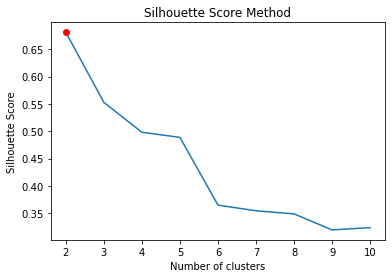

In [43]:
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')

elbow는 k=2,k=3사이가 best, s.s는 k=2가 best -> k=3가 best
(왜냐면, iris data set은 세가지의 꽃의 종류를 가지고 있다는 것을 알고 있기 때문)

From the figure above, we can see that when the number of cluster is 2, average silhouette score is maximized. However, the elbow method shows the number of cluster 3 is more proper.

Thus we choose the number of cluster to be **3**.


### Hierarchical clustering

Hierarchical clustering works by first putting each data point in their own cluster and then merging clusters based on some rule, until there are only the wanted number of clusters remaining. For this to work, there needs to be a distance measure between the data points. With this distance measure `d`, we can define another distance measure between the **clusters** U and V using one of the following methods (*linkages*):
(계층적 클러스터링은 먼저 각 데이터 지점을 자체 클러스터에 넣은 다음 원하는 클러스터 수만 남아 있을 때까지 일부 규칙에 따라 클러스터를 병합하는 방식으로 작동한다. 이를 위해서는 데이터 포인트 간 거리 측정이 필요하다. 이 거리 측정 d를 사용하면 다음 방법(링크) 중 하나를 사용하여 클러스터 U와 V 사이의 다른 거리 측정을 정의할 수 있다.)

* `single`: $d(U, V) := \min_{u \in U, v \in V} d(u,v)$
* `complete`: $d(U, V) := \max_{u \in U, v \in V} d(u,v)$
* `average`: $d(U, V) := \sum_{u \in U, v \in V} \frac{d(u,v)}{|U||V|}$
* `ward`: tries to minimize the variance in each cluster





![](figures/08.02-hierarchical-clustering-dendogram.png)

If I have minimum, I use single  -> If I use single, I'd like to check minimum distance(D&E, A&C가 거리가 가까우므로 같은 그룹으로 묶음/B는 A&C와 가까이 있으므로 A&C와 같은 한 그룹으로 묶음-> 그 다음 모두를 하나의 그룹으로 묶음 -> this is hierarchy, which is dendrogram)

왼쪽은 single(check minimum distance -> one point to another point) 
/ 오른쪽은 hierarchy - 여기서 y axis is distance(Euclidean,Manhattan..)

At each iteration of the algorithm two clusters that are closest to each other are merged. After this the distance between the clusters are recomputed, and then it continues to the next iteration.

![](figures/08.03-hierarchical-agglomerative-clustering.png)

(a)에서 A&B가 가까이 있음 (한 그룹임) D&E도 가까이 있음 -> (b)에서 그 다음 가까운게 C라서 A&B에 묶음 -> (c)에서 F가 그 다음 가까워서 D&E에 묶음 -> (d)에서 그 다음 다 같이 한 그룹으로 묶음

Below is an example with a botanical dataset with 150 samples from three species. Each species appears in the dataset 50 times. Each sample point has 4 features, which are basically dimensions of the "leaves" of the flower.

We use the [seaborn](https://seaborn.pydata.org/index.html) library to both to compute the clustering and to visualize the result. The visualization consists of two parts: the *heatmap*, whose rows and/or columns may be reordered so as to have the elements of the same cluster next to each other; and the *dendrogram*, which shows the way the clusters were merged. The colors give the length of the corresponding features.

['setosa' 'versicolor' 'virginica']


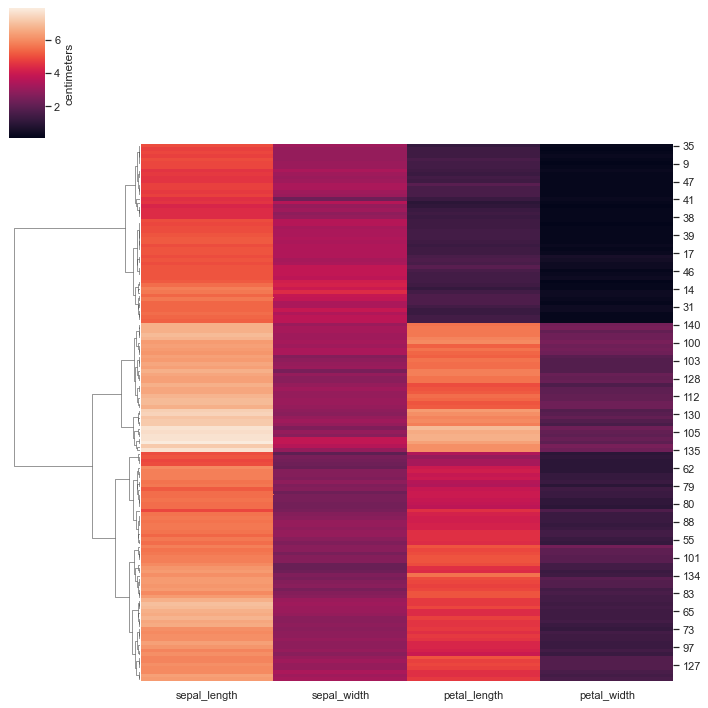

In [74]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column (pull out) -> because species is categorical data, so I can't measure distance with categorical data
print(species.unique())         # The samples seems to be from these three species (unique한지 check)
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")
# 마지막줄 method를 single, complete, average .. 으로 바꿀 수 있음 -> then, group이 달라짐(group안의 구성 요소 ..?) but 비슷함
# 어디에 뭐가 몰려있는지 보여주는 것 -> 시각화(cluster map : cluster 한 것을 보여주는 것)

###### This is dendogram of iris data set
###### X axis shows attribute
###### dark is very small number(1.5 이하)
###### white is large number(7.5이상) -> sample의 개수 크다
###### 여러개의 그룹이 될 수 있음(2개 또는 3개 ..)

With sharp eye and good will one can discern three clusters in the above heatmap and dendrogram.

###### density based clustering : K-means, AHC, below example

### More complicated example

The k-means algorithm can have difficulties when the clusters are not convex shapes:

In [58]:
from sklearn.datasets import make_moons #another randomized dataset to make moon
X,y = make_moons(200, noise=0.05, random_state=0) # generate 200 data, noise is very small(data들 간의 거리가 매우 작다), random state은 아무 정수나 사용가능

In [59]:
X[:10] # 처음부터 10개의 행 / # X[:,10] # 행은 다 뽑고 열 10개 뽑는것

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874],
       [ 1.8820287 , -0.04238449],
       [ 0.97481551,  0.20999374],
       [ 0.88798782, -0.48936735],
       [ 0.89865156,  0.36637762],
       [ 1.11638974, -0.53460385]])

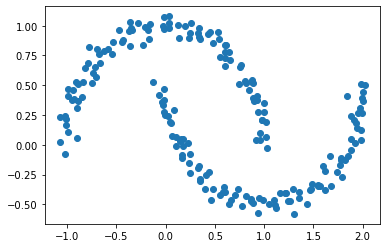

In [60]:
plt.scatter(X[:,0], X[:,1]); # X[:,0]: X의 first column / X[:,1] : X의 second column
# 200 data in here / it is moon shape
# 위로 볼록이 first group, 아래볼록이 other group -> those 2 group
# can K-means do cluster on this

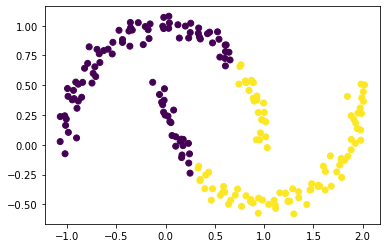

In [61]:
# K-means을 한 결과 -> cluster is seperated into 2 but 대각선이 seperator -> why?
# K-means : we want to data mean centroid (center point) -> In this data set, We cannot say center point, because all data in the particular group
# It is not good for K-means
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);
# 가상의 선을 그어서 나눔(대각선을 기준으로 나눔)
# center point 찾기 어려움 -> 이 방법 적합하지 않음

clustering seperated into 2 / k-means is centroid(in the center point)

The clustering does not work well now, since it is not possible to separate the two clusters with a line. We could embed this data set into a higher dimensional space, where the separation is possible. And then apply the k-means clustering.

Alternatively, we can use a different type of clustering algorithm for this case. The *DBSCAN algorithm* is based on densities and works well on data whose density in the clusters is uniform.

In [62]:
# DBSCAN 알고리즘은 밀도를 기반으로 하며 클러스터 밀도가 균일한 데이터에서 잘 작동
# cluster에 따라 나눔

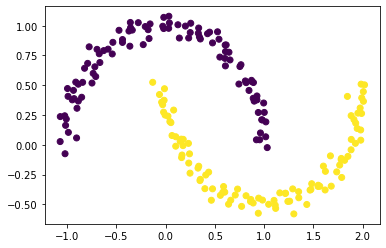

In [63]:
# DBSCAN : density based, spartial clustering, clustering analysis with noise
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3) # eps : radius(if i have kind of data, and i have 1 point(원의 중심), 반지름이 0.3인 원의 범위 -> distance from the particular point)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);
# data에 따라 존재하기도 함 -> minimum points(min pts) : how many point you want to put in the radius(I want to have the number of point in radius-> ex)5개면 이걸 한 그룹으로 만들수 있음)

The good news is that DBSCAN does not require the user to specify the number of clusters(k). But now the algorithm depends on another hyperparameter: a threshold for distance (here 0.3).
###### DBSCAN이 사용자가 클러스터 수(k)를 지정할 필요가 없다는 것이다. 그러나 이제 알고리즘은 거리에 대한 임계값(여기서 0.3)이라는 또 다른 하이퍼 파라미터에 의존한다.

You don't need to specify K -> Just define the radius

### Clustering digits

digit is data set 이름임 / digit is number

Using scikit-learn we can download a set of 1797 images of handwritten digits with the correct labels 0,1,...,9. The images have quite a low resolution: 8*8=64 pixels. Let's see how our machine learning method works with this kind of data.

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [65]:
kmeans = KMeans(n_clusters=10, random_state=0) # why 10 ? -> 0,1,2,3,4,5,6,7,8,9 -> 10개
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
# 10 rows(represent 0~9까지의 특성), 64 columns

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

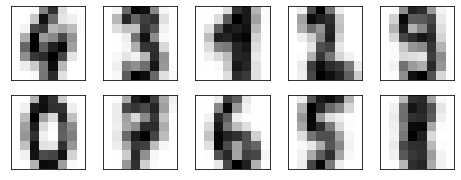

In [68]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) # 2 rows and 5 columns
centers = kmeans.cluster_centers_.reshape(10, 8, 8) # 10 data, 8 * 8 칸에 0은 하얀색, 1은 검정색으로 숫자 표현(grey_scale)
for axi, center in zip(ax.flat, centers): #.flat : show to bigger
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary) # image of the center(imshow center) / nearest : 

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in them:

In [70]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] #change order using by mode function

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels) # between cluster result(true label), target of this label(actual label)

0.7952142459654981

With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this:

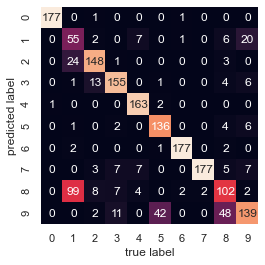

In [75]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
# 대각선이 색깔이 달라야함 (왜냐면 색깔이 다르면 그 값이 많은 것이므로)

##### 136 : there are 136 data , actual is 5 & cluster result is 5
##### 6 : actual data is 9 & cluster result is 5 (9 rows, 5 colums)
##### 99 : actual is 1 & cluster result is 8
##### -> clustering true label, actual label 보여주기 좋은 heatmap

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!